In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cricket_Dataset.csv")


# Dropping the Unnamed column since it is not required for analysis

In [3]:
df.drop("Unnamed: 0",axis = 1,inplace=True)


In [4]:
df.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Margin', 'Ground', 'Match Date',
       'Winner', 'Host_Country', 'Venue_Team1', 'Venue_Team2', 'Innings_Team1',
       'Innings_Team2'],
      dtype='object')

# Renaming column names wih spaces

In [5]:
df.rename(columns={"Team 1":"Team1","Team 2":"Team2"},inplace=True)

In [6]:
df.columns

Index(['Scorecard', 'Team1', 'Team2', 'Margin', 'Ground', 'Match Date',
       'Winner', 'Host_Country', 'Venue_Team1', 'Venue_Team2', 'Innings_Team1',
       'Innings_Team2'],
      dtype='object')

# Filtering records for Team India (rows where either Team1 or Team2 is India)

In [7]:
India_df = df.where((df.Team1=="India") |(df.Team2=="India"))
print(India_df)

       Scorecard        Team1        Team2           Margin      Ground  \
0            NaN          NaN          NaN              NaN         NaN   
1            NaN          NaN          NaN              NaN         NaN   
2            NaN          NaN          NaN              NaN         NaN   
3            NaN          NaN          NaN              NaN         NaN   
4            NaN          NaN          NaN              NaN         NaN   
5            NaN          NaN          NaN              NaN         NaN   
6            NaN          NaN          NaN              NaN         NaN   
7            NaN          NaN          NaN              NaN         NaN   
8            NaN          NaN          NaN              NaN         NaN   
9            NaN          NaN          NaN              NaN         NaN   
10      ODI # 12      England        India  Winner2ndInning       Leeds   
11      ODI # 13      England        India  Winner2ndInning    The Oval   
12           NaN         

# What is India’s total Win percentage?

In [8]:
#Total number of matches played by India
India_team1_df=India_df.where(India_df.Team1=="India")
India_team1_df.count()

#Total number of matches won by India
India_Winner_df=India_team1_df.where(India_df.Winner=="India")
India_Winner_df.count()

India_Win_PCT = (India_Winner_df.Team1.count()/India_team1_df.Team1.count())*100
print("Win Percentage : ",India_Win_PCT)

Win Percentage :  53.97727272727273


# What is India’s total Loss percentage?

In [9]:
#Total number of matches played by India
India_team1_df=India_df.where(India_df.Team1=="India")
India_team1_df.count()

#Total number of matches Lost by India
India_Loss_df=India_team1_df.where(India_df.Winner!="India")
India_Loss_df.count()

India_Loss_PCT = (India_Loss_df.Team1.count()/India_team1_df.Team1.count())*100
print("Loss Percentage : ",India_Loss_PCT)

Loss Percentage :  46.02272727272727


# Pie Plot

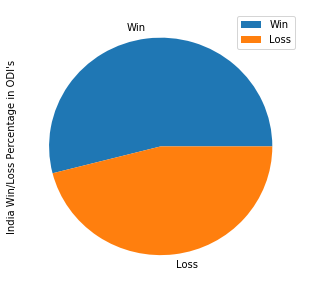

In [10]:
pie_df = pd.DataFrame({'India Win/Loss Percentage in ODI\'s':[India_Win_PCT,India_Loss_PCT]},index=['Win','Loss'])
pie_df
plot = pie_df.plot.pie(y='India Win/Loss Percentage in ODI\'s', figsize=(5, 5))

# Total number of matches Played by India Away from home

In [11]:

India_team1_away_df=India_team1_df.where(India_team1_df.Venue_Team1=='Away')
India_team1_away_df.count()


Scorecard        295
Team1            295
Team2            295
Margin           295
Ground           295
Match Date       295
Winner           295
Host_Country     295
Venue_Team1      295
Venue_Team2      295
Innings_Team1    295
Innings_Team2    295
dtype: int64

# Total number of matches WON by India Away from home 

In [12]:


India_team1_won_away_df=India_team1_df.where((India_df.Winner=="India") & (India_team1_df.Venue_Team1=='Away'))
India_team1_away_df.count()

Scorecard        295
Team1            295
Team2            295
Margin           295
Ground           295
Match Date       295
Winner           295
Host_Country     295
Venue_Team1      295
Venue_Team2      295
Innings_Team1    295
Innings_Team2    295
dtype: int64

# Total number of matches LOST by India Away from home

In [13]:
India_team1_lost_away_df=India_team1_df.where((India_df.Winner!="India") & (India_team1_df.Venue_Team1=='Away'))
India_team1_lost_away_df.count()

Scorecard        163
Team1            163
Team2            163
Margin           163
Ground           163
Match Date       163
Winner           163
Host_Country     163
Venue_Team1      163
Venue_Team2      163
Innings_Team1    163
Innings_Team2    163
dtype: int64

# India Win Percentage Away in ODI's

In [14]:
India_Win_Away_PCT = (India_team1_won_away_df.Team1.count()/India_team1_away_df.Team1.count())*100
print("India Win Percentage Away in ODI\'s'",India_Win_Away_PCT)

India Win Percentage Away in ODI's' 44.74576271186441


# India Loss Percentage Away in ODI's

In [15]:
India_Loss_Away_PCT = (India_team1_lost_away_df.Team1.count()/India_team1_away_df.Team1.count())*100
print("India Loss Percentage Away in ODI\'s'",India_Loss_Away_PCT)

India Loss Percentage Away in ODI's' 55.254237288135585


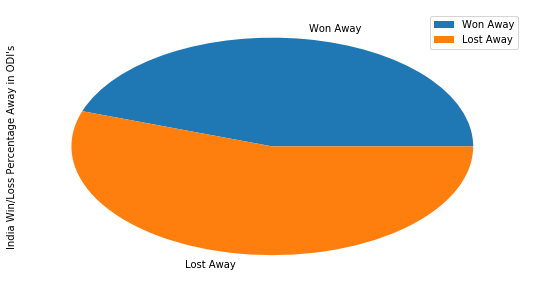

In [16]:
df = pd.DataFrame({'India Win/Loss Percentage Away in ODI\'s':[India_Win_Away_PCT,India_Loss_Away_PCT]},index=['Won Away','Lost Away'])
plot = df.plot.pie(y='India Win/Loss Percentage Away in ODI\'s', figsize=(9, 5))



# Total ODI's teams have played against India

In [41]:
df1=India_df.where(India_df.Team1=="India")
df1.Team2.value_counts()

Sri Lanka       142
Pakistan        123
Australia       118
West Indies     117
New Zealand      95
England          91
South Africa     74
Zimbabwe         61
Bangladesh       32
Kenya            13
U.A.E.            3
Ireland           3
Netherlands       2
Scotland          1
Namibia           1
Afghanistan       1
Bermuda           1
Hong Kong         1
East Africa       1
Name: Team2, dtype: int64